# Screen disease model feature is screen spalist

This model predict screen disease which disease have you body 

Data is provided by : https://www.kaggle.com/datasets/shubhamgoel27/dermnet
1. Check to Use GPU 
2. Download data image and load preprocess image 
3. Check to see how many image have each directory
4. Data augmentation create inside our model
5. Use transfer learning create the model feature extraction
6. Evaluate model
7. Create transfer learning fine-tuning model
8. Evaluate model 
9. **experiment experiment experiment**


# Feature Extraction Model Frist

## 1. Check To Use GPU

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d8ce403b-6ef2-71ca-893e-70ab044a9a07)


## 2. Download data image and load preprocess 

In [3]:
# Frist download our helper function
!wget https://raw.githubusercontent.com/iamzen24/course_project/main/halper_function.py

--2022-05-20 13:45:16--  https://raw.githubusercontent.com/iamzen24/course_project/main/halper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10235 (10.0K) [text/plain]
Saving to: ‘halper_function.py’

halper_function.py  100%[===================>]  10.00K  --.-KB/s    in 0s      

2022-05-20 13:45:17 (109 MB/s) - ‘halper_function.py’ saved [10235/10235]



In [4]:
# import series of helper function
from halper_function import load_and_prep_image, pred_and_plot,compare_historys,create_tensorboard_callback,plot_loss_curves , unzip_data,walk_through_dir

In [5]:
# Download data and prerpcess image 
# this time already download and store our google colab only for uzip data set
unzip_data("/content/drive/MyDrive/screen_disease.zip")

In [6]:
# import tensorflow 
import tensorflow as tf

In [7]:
# preprocess our data load train and test set
train_dir = "train/"
test_dir = "test/"
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                shuffle=False)

Found 15557 files belonging to 23 classes.
Found 4002 files belonging to 23 classes.


## 3. Check to see how many image have each directory.

In [29]:
class_names = test_data.class_names
class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [8]:
walk_through_dir(dir_path="train")

There are 23 directories and 0 images in 'train'.
There are 0 directories and 1040 images in 'train/Nail Fungus and other Nail Disease'.
There are 0 directories and 448 images in 'train/Bullous Disease Photos'.
There are 0 directories and 1300 images in 'train/Tinea Ringworm Candidiasis and other Fungal Infections'.
There are 0 directories and 606 images in 'train/Systemic Disease'.
There are 0 directories and 420 images in 'train/Lupus and other Connective Tissue diseases'.
There are 0 directories and 405 images in 'train/Herpes HPV and other STDs Photos'.
There are 0 directories and 1149 images in 'train/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'.
There are 0 directories and 489 images in 'train/Atopic Dermatitis Photos'.
There are 0 directories and 840 images in 'train/Acne and Rosacea Photos'.
There are 0 directories and 463 images in 'train/Melanoma Skin Cancer Nevi and Moles'.
There are 0 directories and 260 images in 'train/Poison Ivy Photos and other Co

In [9]:
walk_through_dir("train")

There are 23 directories and 0 images in 'train'.
There are 0 directories and 1040 images in 'train/Nail Fungus and other Nail Disease'.
There are 0 directories and 448 images in 'train/Bullous Disease Photos'.
There are 0 directories and 1300 images in 'train/Tinea Ringworm Candidiasis and other Fungal Infections'.
There are 0 directories and 606 images in 'train/Systemic Disease'.
There are 0 directories and 420 images in 'train/Lupus and other Connective Tissue diseases'.
There are 0 directories and 405 images in 'train/Herpes HPV and other STDs Photos'.
There are 0 directories and 1149 images in 'train/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'.
There are 0 directories and 489 images in 'train/Atopic Dermatitis Photos'.
There are 0 directories and 840 images in 'train/Acne and Rosacea Photos'.
There are 0 directories and 463 images in 'train/Melanoma Skin Cancer Nevi and Moles'.
There are 0 directories and 260 images in 'train/Poison Ivy Photos and other Co

## 4. Create Data Augmentation

In [10]:
# create data augmentation inside our mode
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
   layers.RandomFlip(mode="horizontal"),
   layers.RandomRotation(0.2),
   layers.RandomZoom(0.2),
   layers.RandomHeight(0.2),
   layers.RandomWidth(0.2),
#    layers.Rescaling(scale=1/255.) This layer imported on tensorflow transfer leanring model like ResNetV50 (but this time not importent on efficieant net B0 becuse already have)
])

## 5. Use transfer-learning create feature extraction model


In [11]:
# create base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create input layers
inputs = layers.Input(shape=(224,224,3),name="input_layer")
# data augmentation
# x = data_augmentation(inputs,training=True) # Trining to True than data augmentation work this new add in tensorflow
# pass thourg the base model
x = base_model(inputs,training=False)
# pooled our model than out put to vector
x = layers.GlobalAveragePooling2D(name="global_pooled_average_2D")(x)
# create output layer
output = layers.Dense(len(test_data.class_names),activation="softmax",name="output_layer")(x)

# create the feature extraction model
feature_extraction_model = tf.keras.Model(inputs,output)
# compile the model
feature_extraction_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                                 optimizer=tf.keras.optimizers.Adam(),
                                 metrics=["accuracy"])


16719872/16705208 [==============================] - 0s 0us/step


In [12]:
# create two callback TensorBoardCallback and model_checkpoint
from halper_function import create_tensorboard_callback 

check_point_path = "Model_Check_point_load/cp.ckpt"
model_check_point_callback = tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,
                                                                monitor='val_accuracy',
                                                                save_best_only=True,
                                                                save_weights_only=True,
                                                                save_freq='epoch',
                                                                verbose=1)

In [13]:
# Fit the feature extraction model
feature_extraction_history = feature_extraction_model.fit(train_data,
                                                          epochs=5,
                                                          validation_data=test_data,
                                                          validation_steps=int(0.15 * len(test_data)),
                                                          callbacks=[create_tensorboard_callback(dir_name="log_dir",experiment_name="feature_extraction_model_tensorboard"),model_check_point_callback])

Saving TensorBoard log files to: log_dir/feature_extraction_model_tensorboard/20220520-134558
Epoch 1/5
487/487 [==============================] - ETA: 0s - loss: 2.3773 - accuracy: 0.3005
Epoch 1: val_accuracy improved from -inf to 0.51910, saving model to Model_Check_point_load/cp.ckpt
487/487 [==============================] - 50s 72ms/step - loss: 2.3773 - accuracy: 0.3005 - val_loss: 1.8706 - val_accuracy: 0.5191
Epoch 2/5
486/487 [============================>.] - ETA: 0s - loss: 2.0626 - accuracy: 0.3858
Epoch 2: val_accuracy improved from 0.51910 to 0.55903, saving model to Model_Check_point_load/cp.ckpt
487/487 [==============================] - 34s 69ms/step - loss: 2.0629 - accuracy: 0.3857 - val_loss: 1.7025 - val_accuracy: 0.5590
Epoch 3/5
486/487 [============================>.] - ETA: 0s - loss: 1.9255 - accuracy: 0.4236
Epoch 3: val_accuracy did not improve from 0.55903
487/487 [==============================] - 34s 70ms/step - loss: 1.9252 - accuracy: 0.4237 - val_loss

 ##  5. Evaluate the model

In [14]:
feature_extraction_result = feature_extraction_model.evaluate(test_data)
feature_extraction_result

126/126 [==============================] - 9s 71ms/step - loss: 2.0135 - accuracy: 0.3986


[2.013540744781494, 0.39855071902275085]

# Fine-Tuning model only train 30 layer in pretrained model


In [15]:
# load feature extraction model
feature_extraction_model.load_weights(check_point_path)

In [16]:
feature_extraction_model.evaluate(test_data)

126/126 [==============================] - 9s 68ms/step - loss: 2.0324 - accuracy: 0.4033


[2.0324180126190186, 0.40329834818840027]

In [17]:
# let's 30 layer to trainable to true
feature_extraction_model.layers[1].trainable = True
for layer in feature_extraction_model.layers[1].layers[:-30]:
    layer.trainable = False
# recompil the model
feature_extraction_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                                 metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
# cheack to how many layer are trainable
for layer in feature_extraction_model.layers:
    print(layer.name,layer.trainable)

input_layer True
efficientnetb0 True
global_pooled_average_2D True
output_layer True


In [19]:
# check to see how many layer are trainable in base model
print(len(feature_extraction_model.layers[1].trainable_variables))

28


In [20]:
# now fit the model
fine_tuning_history = feature_extraction_model.fit(train_data,
                                                   epochs=10,
                                                   validation_data=test_data,
                                                   validation_steps=len(test_data),
                                                   initial_epoch=feature_extraction_history.epoch[-1],
                                                   callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="fine-Tuning-model_callback")])

Saving TensorBoard log files to: transfer_learning/fine-Tuning-model_callback/20220520-134925
Epoch 5/10
487/487 [==============================] - 55s 99ms/step - loss: 1.6670 - accuracy: 0.4920 - val_loss: 1.9104 - val_accuracy: 0.4345
Epoch 6/10
487/487 [==============================] - 47s 96ms/step - loss: 1.4040 - accuracy: 0.5736 - val_loss: 1.8691 - val_accuracy: 0.4545
Epoch 7/10
487/487 [==============================] - 47s 96ms/step - loss: 1.1657 - accuracy: 0.6481 - val_loss: 1.8462 - val_accuracy: 0.4770
Epoch 8/10
487/487 [==============================] - 47s 96ms/step - loss: 0.9416 - accuracy: 0.7216 - val_loss: 1.8684 - val_accuracy: 0.4925
Epoch 9/10
487/487 [==============================] - 47s 96ms/step - loss: 0.7432 - accuracy: 0.7814 - val_loss: 1.9167 - val_accuracy: 0.5015
Epoch 10/10
487/487 [==============================] - 47s 96ms/step - loss: 0.5690 - accuracy: 0.8425 - val_loss: 1.9989 - val_accuracy: 0.5077


### Evaluate the model 


In [21]:
fine_tuning_model_result = feature_extraction_model.evaluate(test_data)

126/126 [==============================] - 9s 68ms/step - loss: 1.9989 - accuracy: 0.5077


# Fine-Tuning all layer are trainable 

In [22]:
feature_extraction_model.layers[1].trainable = True
# recompile the model
feature_extraction_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                                 metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
# check how many layer are trainable in base model
print(len(feature_extraction_model.layers[1].trainable_variables))

211


In [24]:
# now fit the model
fine_tuning_all_layer_train_history = feature_extraction_model.fit(train_data,
                                                                   epochs=15,
                                                                   validation_data=test_data,
                                                                   validation_steps=int(0.15 * len(test_data)),
                                                                   initial_epoch=fine_tuning_history.epoch[-1],
                                                                   callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="fine_tuning_all_layer_trainable")])

Saving TensorBoard log files to: transfer_learning/fine_tuning_all_layer_trainable/20220520-135424
Epoch 10/15
487/487 [==============================] - 176s 345ms/step - loss: 0.6262 - accuracy: 0.8078 - val_loss: 1.0595 - val_accuracy: 0.7344
Epoch 11/15
487/487 [==============================] - 169s 346ms/step - loss: 0.3954 - accuracy: 0.8848 - val_loss: 1.1330 - val_accuracy: 0.7413
Epoch 12/15
487/487 [==============================] - 167s 343ms/step - loss: 0.2880 - accuracy: 0.9193 - val_loss: 1.2701 - val_accuracy: 0.7309
Epoch 13/15
487/487 [==============================] - 166s 341ms/step - loss: 0.2187 - accuracy: 0.9382 - val_loss: 1.0551 - val_accuracy: 0.7691
Epoch 14/15
487/487 [==============================] - 168s 344ms/step - loss: 0.1769 - accuracy: 0.9497 - val_loss: 1.3226 - val_accuracy: 0.7292
Epoch 15/15
487/487 [==============================] - 167s 342ms/step - loss: 0.1609 - accuracy: 0.9524 - val_loss: 1.2184 - val_accuracy: 0.7622


In [ ]:
 fine_tuning_all_layer_result = feature_extraction_model.evaluate(test_data)
 fine_tuning_all_layer_result

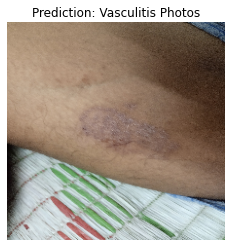

In [33]:
pred_and_plot(feature_extraction_model,filename="/content/drive/MyDrive/Image/tinia_3.jpg",class_names=class_names)

# Create new model fine tuning with data augmentation

In [34]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')

In [35]:
# create base model
base_model_2 = tf.keras.applications.EfficientNetB7(include_top=False)
base_model_2.trainable = False
# create input layer 
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layers")
# create data augmentation
x = data_augmentation(inputs,training=True)
# pass thorugh the base model
x = base_model_2(x,training=False)
# pooled our model output
x = tf.keras.layers.GlobalAveragePooling2D(name="global_pooling_layer_2D")(x)
# output layer create
x = tf.keras.layers.Dense(len(test_data.class_names))(x)
outputs = tf.keras.layers.Activation("softmax",dtype=tf.float32,name="outputs_layer")(x)
# pass the tensorflow model 
fine_tuning_model_agm = tf.keras.Model(inputs,outputs)
# compile the model
fine_tuning_model_agm.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                             optimizer=tf.keras.optimizers.Adam(0.0001),
                             metrics=["accuracy"])

258088960/258076736 [==============================] - 3s 0us/step


In [36]:
fine_tuning_model_agm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 global_pooling_layer_2D (Gl  (None, 2560)             0         
 obalAveragePooling2D)                                           
                                                                 
 dense (Dense)               (None, 23)                58903     
                                                                 
 outputs_layer (Activation)  (None, 23)                0         
                                                           

In [37]:
# check to dtype policy
for layer in fine_tuning_model_agm.layers:
    print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layers True float32 <Policy "float32">
sequential True float32 <Policy "float32">
efficientnetb7 False float32 <Policy "mixed_float16">
global_pooling_layer_2D True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
outputs_layer True float32 <Policy "float32">


In [ ]:
# now fit the model
fine_tuning_model_data_agm_history = fine_tuning_model_agm.fit(train_data,
                                                               epochs=5,
                                                               validation_data=test_data,
                                                               validation_steps=int(0.15 * len(test_data)))

Epoch 1/5
487/487 [==============================] - 187s 345ms/step - loss: 2.7706 - accuracy: 0.1888 - val_loss: 2.2635 - val_accuracy: 0.3889
Epoch 2/5
487/487 [==============================] - 148s 303ms/step - loss: 2.5284 - accuracy: 0.2619 - val_loss: 2.1835 - val_accuracy: 0.4167
Epoch 3/5
487/487 [==============================] - 141s 290ms/step - loss: 2.4375 - accuracy: 0.2817 - val_loss: 2.1002 - val_accuracy: 0.4427
Epoch 4/5
487/487 [==============================] - 137s 281ms/step - loss: 2.3813 - accuracy: 0.2983 - val_loss: 2.0684 - val_accuracy: 0.4462
Epoch 5/5
389/487 [======================>.......] - ETA: 26s - loss: 2.3451 - accuracy: 0.3080

In [ ]:
pred_and_plot(fine_tuning_model_agm,filename="drive/MyDrive/image/tinia_1.jpg",class_names=class_names)

In [ ]:
pred_probs = fine_tuning_model_agm.predict(test_data)
pred_probs[:10]

## create fine tuning model with data augmentation with all layer are trainable


In [ ]:
fine_tuning_model_agm.trainable = True
# recompile the model
fine_tuning_model_agm.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"])